# Vectors in 2D: Exercises
> exercises from chapter 2: Drawing with 2D vectors

In [1]:
# make `my_vector_drawing_lib` importable
import sys
sys.path.append('../e02-vector-drawing-lib/')

## Exercise 2.1

Consider the dinosaur represented by the following picture:

![Dino](images/dino_polygon.png)

What are the $x-$ and $y-$ coordinates of the point at the tip of the dinosaur's toe?

The coordinates of the tip of the dinosaur's toe are $(-1, -4)$.

## Exercise 2.2
Draw the point in the plane and the arrow corresponding to the point $(2, -2)$.

The signature of the `draw(...)` function is:

```python
def draw(*objects, origin=True, axes=True, grid=(1, 1), nice_aspect_ratio=True, width=6, save_as=None):
```

The first parameter is a variable number of objects of type `Polygon`, `Points`, `Arrow` or `Segment`.

In this case, `Points` is the appropriate 2D object element to represent the point. `Points` constructor accepts a variable number of vectors/points:

```python
class Points():
    def __init__(self, *vectors, color=BLACK):
...
```

The `Arrow` class is the one we should use to represent the arrow:

```python
class Arrow():
    def __init__(self, tip, tail=(0, 0), color=RED):
...
```

Therefore, the point and arrow can be drawn as follows:

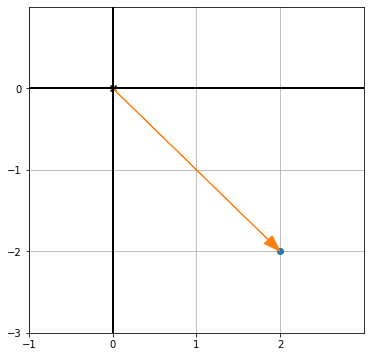

In [2]:
from my_vector_drawing_lib import draw, Points, Arrow, BLUE, ORANGE

point = (2, -2)

draw(
    Points(point, color=BLUE), 
    Arrow(point, color=ORANGE)
    )

## Exercise 2.3

By looking at the locations of the dinosaur's points:

![dino](images/dino_polygon.png)

infer the vectors that define the dino shape

In [3]:
dino_vectors = [
    (6, 4), (3, 1), (1, 2), (-1, 5),
    (-2, 5), (-3, 4), (-4, 4), (-5, 3),
    (-5, 2), (-2, 2), (-5, 1), (-4, 0), 
    (-2, 1), (-1, 0), (0, -3), (-1, -4), 
    (1, -4), (2, -3), (1, -2), (3, -1), 
    (5, 1)    
    ]

## Exercise 2.4

Draw the dinosaur with the dots connected by constructing a `Polygon` object with the `dino_vectors` as its vertices. Draw also the points that define the dino shape:

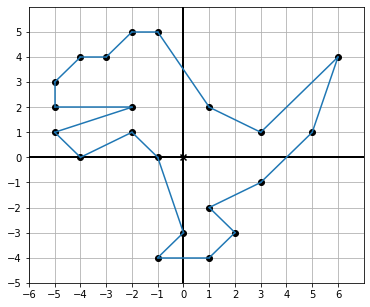

In [4]:
from my_vector_drawing_lib import Polygon

dino_vectors = [
    (6, 4), (3, 1), (1, 2), (-1, 5),
    (-2, 5), (-3, 4), (-4, 4), (-5, 3),
    (-5, 2), (-2, 2), (-5, 1), (-4, 0), 
    (-2, 1), (-1, 0), (0, -3), (-1, -4), 
    (1, -4), (2, -3), (1, -2), (3, -1), 
    (5, 1)    
    ]

dino_polygon = Polygon(*dino_vectors)
dino_points = Points(*dino_vectors)
draw(dino_polygon, dino_points)

## Exercise 2.5

Draw the vectors `(x, x ** 2)` for x in the range from $x = -10 \text{ to } x = 11$ as points (dots) using the `draw(...)` function. What is the result?

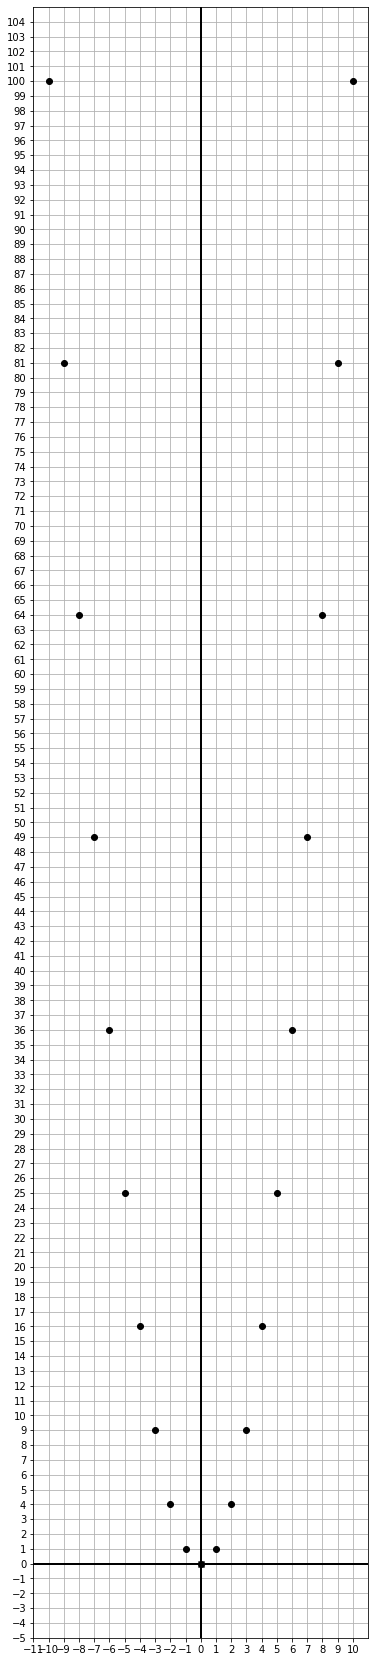

In [5]:
vectors = [(x, x ** 2) for x in range(-10, 11)]
points = Points(*vectors)

draw(points)

We can play a little bit with `draw(...)` optional parameters to make it look nicer on the screen:

```python
def draw(*objects, origin=True, axes=True, grid=(1, 1), nice_aspect_ratio=True, width=6, save_as=None)
```

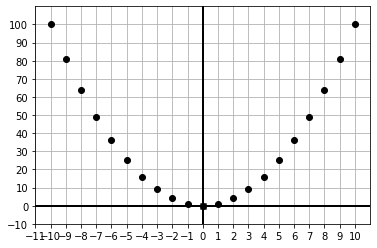

In [6]:
draw(points, grid=(1, 10), nice_aspect_ratio=False)

## Exercise 2.6

If the vector $ u = (-2, 0) $, the vector $ v = (1.5, 1.5) $, and the vector $ w = (4, 1) $, what are the results of $ u + v $, $ v + w $, and $ u + w $? What is the result of $ u + v + w $?

Calculate it both manually and programmatically.

Manually:

$ u + v = (-2, 0) + (1.5, 1.5) = (-0.5, 1.5) $

$ v + w = (1.5, 1.5) + (4, 1) = (5.5, 2.5) $

$ u + w = (-2, 0) + (4, 1) = (2, 1) $

$ u + v + w = (-2, 0) + (1.5, 1.5) + (4, 1) = (3.5, 2.5) $

Programmatically:

In [7]:
u = (-2, 0)
v = (1.5, 1.5)
w = (4, 1)

def add(*vectors):
    # less pythonic, more efficient (I guess)
    sum_vector_coordinates = [0, 0]
    for v in vectors:
        sum_vector_coordinates[0] += v[0]
        sum_vector_coordinates[1] += v[1]
    return (sum_vector_coordinates[0], sum_vector_coordinates[1])
    # more pythonic, less efficient (two separate iterations)
    # return (sum([v[0] for v in vectors]), sum(v[1] for v in vectors))

print(f'u + v = {add(u, v)}')
print(f'v + w = {add(v, w)}')
print(f'u + w = {add(u, w)}')
print(f'u + v + w = {add(u, v, w)}')

u + v = (-0.5, 1.5)
v + w = (5.5, 2.5)
u + w = (2, 1)
u + v + w = (3.5, 2.5)


## Exercise 2.7

You can add any number of vectors together by summing all of their *x-coordinates* and all of their *y-coordinates*.

For instance, the fourfold sum $ (1, 2) + (2, 4) + (3, 6) + (4, 8) $ will be $ (10, 20) $.

Implement a revised `add()` function that takes any numnber of vectors as arguments:

We have already implemented that one in the previous exercise, both in a Pythonic and more imperative way. In this exercise we have added an extra one that uses `zip()` to iterate over the received vectors.

In [8]:
def add_pythonic(*vectors):
    return (sum([v[0] for v in vectors]), sum([v[1] for v in vectors]))

def add_imperative(*vectors):
    x_coord = 0
    y_coord = 0
    for v in vectors:
        x_coord += v[0]
        y_coord += v[1]
    return (x_coord, y_coord)

print(add_pythonic(
    (1, 2), (2, 4), (3, 6), (4, 8)
    ))
print(add_imperative(
    (1, 2), (2, 4), (3, 6), (4, 8)
    ))    

def add_zip(*vectors):
    zipped = list(zip(*vectors))
    return (sum(zipped[0]), sum(zipped[1]))

print(add_zip(
    (1, 2), (2, 4), (3, 6), (4, 8)
    ))        

(10, 20)
(10, 20)
(10, 20)


## Exercise 2.8

Write a function `translate(translation, vectors)` that takes a translation vector and a list of input vectors, and returns a list of the input vectors all translated by the translation vector.

For instance:

`translate((1, 1), [(0, 0), (0, 1), (-3, -3)]) = [(1, 1), (1, 2), (-2, -2)]`


This exercise is very easy to solve if we recall that *translation* is the same as *addition*:

In [9]:
def translate(translation_vector, vectors):
   return [add(translation_vector, vector) for vector in vectors]

print(translate((1, 1), [(0, 0), (0,1 ), (-3, -3)]))

[(1, 1), (1, 2), (-2, -2)]


## Mini-project 2.9

Any sum of vectors $ v + w $ gives the same result as $ w + v $. 
Explain why this is true using the definition of the verctor sum on coordinates. Also draw a picture to show why this is true geometrically.

The sum of two vectors in the plane is defined as:

$
v + w = (v_x, v_y) + (w_x, w_y) = (v_x + w_x, v_y + w_y) = \\
(w_x + v_x, w_y + v_y) = (w_x, w_y) + (v_x, v_y) = w + v
$

To demonstrate it geometrically, we have to recall the *tip-to-tail* addition.

$ u + v $ is nothing more than the diagonal of the parallelogram defined by $ u $ and $ v $.

By construction, $ u + v $ is the same as $ v + u $, as we get to the same point if we do the tip-to tail $ u + v $ or $ v + u $.

## Mini-project 2.11 (In-progress)

Write a Python function using vector addition to show 100 simultaneous and non-overlapping copies of the dinosaur.

This exercise if easy if we leverage the `translate()` function.

Then, we just need to compute the dino dimensions (width and height) and use it in a list comprehension to created *displaced copies* of the dino vectors, that we can later draw.

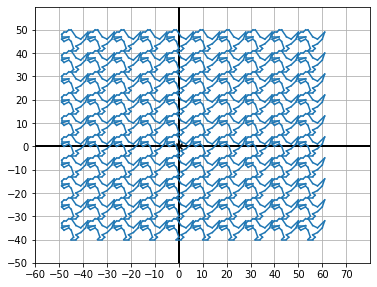

In [24]:
from my_vector_drawing_lib import draw, Polygon 

dino_vectors = [
    (6, 4), (3, 1), (1, 2), (-1, 5),
    (-2, 5), (-3, 4), (-4, 4), (-5, 3),
    (-5, 2), (-2, 2), (-5, 1), (-4, 0), 
    (-2, 1), (-1, 0), (0, -3), (-1, -4), 
    (1, -4), (2, -3), (1, -2), (3, -1), 
    (5, 1)    
    ]


def draw_dinos():
    def get_translated_dino_vectors(pos_x, pos_y): 
        return translate((dino_width * pos_x, dino_height * pos_y), dino_vectors)
    
    def get_dino_dimensions():
        left_most = min([x_coord for x_coord, y_coord in dino_vectors])
        right_most = max([x_coord for x_coord, y_coord in dino_vectors])
        top_most = max([y_coord for x_coord, y_coord in dino_vectors])
        bottom_most = min([y_coord for x_coord, y_coord in dino_vectors])
        dino_width = abs(right_most - left_most)
        dino_height = abs(top_most - bottom_most)
        return dino_width, dino_height

    dino_width, dino_height = get_dino_dimensions()

    translated_dino_vectors_1 = get_translated_dino_vectors(1, 0)
    translated_dino_vectors_2 = get_translated_dino_vectors(-1, 0)

    dinos = [Polygon(*get_translated_dino_vectors(i, j)) for i in range(-4, 6) for j in range(-4, 6)]
    draw(*dinos, grid=(10, 10))

draw_dinos()

The solution from the book is not much different:

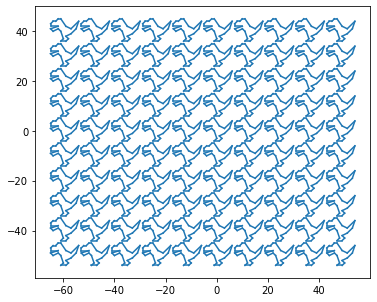

In [25]:
def hundred_dinos():
    translations = [(12 * x, 10 * y) 
                        for x in range(-5, 5) 
                        for y in range (-5, 5)]
    dinos = [Polygon(*translate(t, dino_vectors)) for t in translations]
    draw(*dinos, grid=None, axes=None, origin=None)


hundred_dinos()

## Exercise 2.12

Which is longer, the $ x $ or $ y $ componente of $ (3, -2) + (1, 1) + (-2, 2) $?